<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Batch Normalization with the MNIST Dataset  </font></h1> 

# Table of Contents
In this lab, you will build a Neural Network using  Batch Normalization and compare it to a Neural Network that does not use  Batch Normalization.  You will use the MNIST dataset to test your network. 

<div class="alert alert-block alert-info" style="margin-top: 20px">

<li><a href="#ref1">Neural Network Module and Training Function   </a></li>
<li><a href="#ref2"> Prepare Data </a></li>
<li><a href="#ref3">Define Several Neural Network, Criterion function, Optimizer</a></li>
<li><a href="#ref4">
Train Neural Network using  Batch Normalization and no Batch Normalization </a></li>
<li><a href="#ref5">Analyse Results</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

You'll need the following libraries:  

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

<a id="ref1"></a>
<h2 align=center>Neural Network Module and Training Function </h2> 

define the neural network module or class 

 Neural Network Module with two hidden layers using Batch Normalization

In [2]:
class NetBatchNorm(nn.Module):
    def __init__(self,in_size,n_hidden1,n_hidden2,out_size):

        super(NetBatchNorm,self).__init__()

        self.linear1=nn.Linear(in_size,n_hidden1)
        self.linear2=nn.Linear(n_hidden1,n_hidden2)
        self.linear3=nn.Linear(n_hidden2,out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
    def forward(self,x):
        x=F.sigmoid(self.bn1(self.linear1(x)))
        x=F.sigmoid(self.bn2(self.linear2(x)))
        x=self.linear3(x)
        return x
    def activation(self,x):
        out=[]
        z1=bn1(self.linear1(x))
        out.append(z1.detach().numpy().reshape(-1))
        a1=F.sigmoid(z1)
        out.append(a1.detach().numpy().reshape(-1).reshape(-1))
        z2=bn2(self.linear2(a1))
        out.append(z2.detach().numpy().reshape(-1))
        a2=F.sigmoid(z2)
        out.append(a2.detach().numpy().reshape(-1))
        return out

Neural Network Module with two hidden layers with out Batch Normalization

In [3]:
class Net(nn.Module):
    def __init__(self,in_size,n_hidden1,n_hidden2,out_size):

        super(Net,self).__init__()

        self.linear1=nn.Linear(in_size,n_hidden1)
        self.linear2=nn.Linear(n_hidden1,n_hidden2)
        self.linear3=nn.Linear(n_hidden2,out_size)
        
    def forward(self,x):
        x=F.sigmoid(self.linear1(x))
        x=F.sigmoid(self.linear2(x))
        x=self.linear3(x)
        return x
    def activation(self,x):
        out=[]
        z1=self.linear1(x)
        out.append(z1.detach().numpy())
        a1=F.sigmoid(z1)
        out.append(a1.detach().numpy())
        z2=self.linear2(a1)
        out.append(z2.detach().numpy())
        a2=F.sigmoid(z2)
        out.append(a2.detach().numpy())
        return out 


define a function to  train the model, in this case the function returns a Python dictionary to store the training loss and accuracy on the validation data 

In [5]:
def train(model,criterion, train_loader,validation_loader, optimizer, epochs=100):
    i=0
    useful_stuff={'training_loss':[],'validation_accuracy':[]}  
    
    #n_epochs
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            model.train()
           
            #clear gradient 
            optimizer.zero_grad()
            #make a prediction logits 
            z=model(x.view(-1,28*28))
            # calculate loss 
            loss=criterion(z,y)
    
            # calculate gradients of parameters 
            loss.backward()
            # update parameters 
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        correct=0
        for x, y in validation_loader:
            model.eval()
            #perform a prediction on the validation  data  
            yhat=model(x.view(-1,28*28))
            
            _,lable=torch.max(yhat,1)
            correct+=(lable==y).sum().item()
 
    
        accuracy=100*(correct/len(validation_dataset))
   
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<a id="ref2"></a>
<h2 align=center>Prepare Data </h2> 

Load the training dataset by setting the parameters <code>train </code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [6]:
train_dataset=dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())


Load the testing dataset by setting the parameters train  <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>

In [7]:
validation_dataset=dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

create the criterion function  

In [8]:
criterion=nn.CrossEntropyLoss()

create the training-data loader and the validation-data loader object 

In [9]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)

<a id="ref3"></a>
<h2 align=center>Define Neural Network, Criterion function, Optimizer and Train the  Model  </h2> 

create the criterion function  

In [10]:
criterion=nn.CrossEntropyLoss()


variables for Neural Network Shape <code> hidden_dim</code> used for number of neurons  in both hidden layers.

In [11]:
input_dim=28*28
hidden_dim=100
output_dim=10

print the model parameters 

<a id="ref4"></a>
<h2 align=center>Train Neural Network using Batch Normalization and no Batch Normalization </h2> 

Train Neural Network using  Batch Normalization :

In [16]:
model=NetBatchNorm(input_dim,hidden_dim,hidden_dim,output_dim)
model = nn.Sequential(
    nn.Linear(input_dim,hidden_dim),
    nn.BatchNorm1d(hidden_dim),
    nn.Sigmoid(),
    nn.Linear(hidden_dim,hidden_dim),
    nn.BatchNorm1d(hidden_dim),
    nn.Sigmoid(),
    nn.Linear(hidden_dim,output_dim)
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


training_results_Norm=train(model,criterion, train_loader,validation_loader, optimizer, epochs=5)


Train Neural Network with no Batch Normalization:

In [13]:
model=Net(input_dim,hidden_dim,hidden_dim,output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
training_results=train(model,criterion, train_loader,validation_loader, optimizer, epochs=5)


<a id="ref5"></a>
<h2 align=center>Analyse Results </h2> 

train the network using the Relu activations function

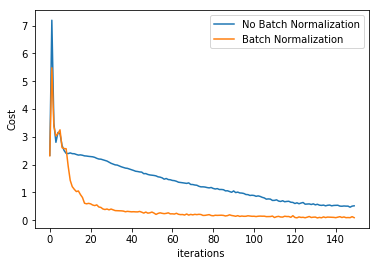

In [18]:
plt.plot(training_results['training_loss'],label='No Batch Normalization')
plt.plot(training_results_Norm['training_loss'],label='Batch Normalization')
plt.ylabel('Cost')
plt.xlabel('iterations ')   
plt.legend()
plt.show()

compare the training loss for each activation 

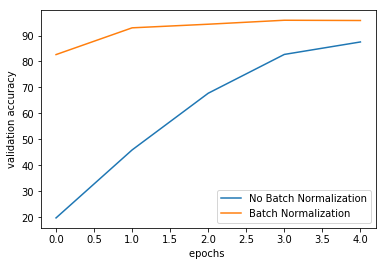

In [19]:
plt.plot(training_results['validation_accuracy'],label='No Batch Normalization')
plt.plot(training_results_Norm['validation_accuracy'],label='Batch Normalization')
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()
plt.show()

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) 

  <hr>
Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).